# Time Series Linear Regression Project
- Sarah DeConink
- 06/22/2023

## Section 0-Setup

In [1]:
# enable the Matplotlib support
%matplotlib inline

In [2]:
# create a function to calculate the Celcius equivalents of the Fahrenheit temps
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

### Display the linear relationship between the Fahrenheit and Celsius temperatures

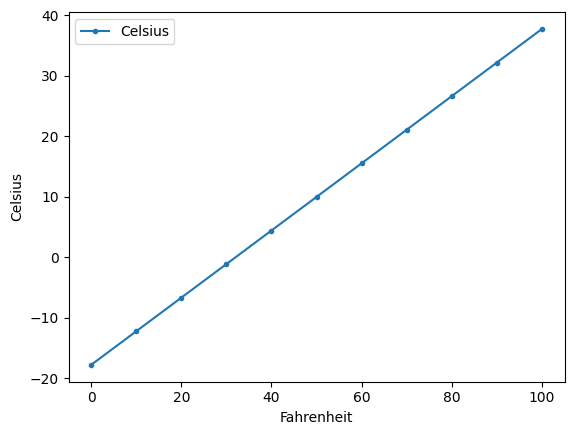

In [4]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')


## Section 1-Load Data

In [6]:
# Load the dataset
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2-View Data

In [9]:
# View the first five rows of the data
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [10]:
# View the last five rows of the data
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3-Clean Data

In [12]:
# Clean the data
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [13]:
# Check the type
nyc.Date.dtype

dtype('int64')

In [14]:
# Truncate last two digits of Date
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4-Descriptive Data

In [16]:
#Set precision to 2 decimal places
pd.set_option('display.precision', 2)

# Descriptive stats
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5-Predict Avg High Temp for Jan 2026

In [17]:
# import modules
from scipy import stats

# use linear regression
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [18]:
# display the slope
linear_regression.slope

0.014771361132966163

In [19]:
# display the intercept
linear_regression.intercept

8.694993233674289

In [20]:
# predict the 2026 value
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Section 6-Scatter Plot

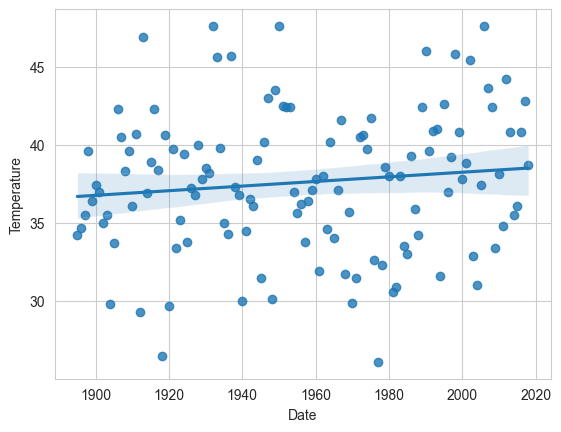

In [22]:
# setup
import seaborn as sns

sns.set_style('whitegrid')

# scatter plot
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

(10.0, 70.0)

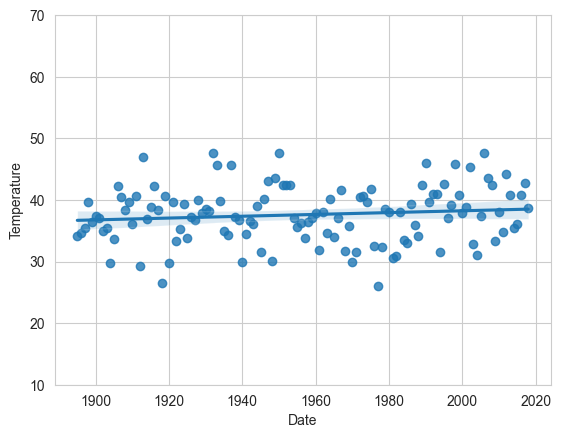

In [41]:
# scale the graph
sns.regplot(x=nyc.Date, y=nyc.Temperature).axes.set_ylim(10, 70)